# W. I. P.

https://www.youtube.com/channel/UCIs1V0XydMx4D8KWGHXmvjw

## Cel

Podzielenie danych na k grup ("Sklastrowanie" ich w k grup)

## Dane wejściowe

Dane wejściowe to tylko nasz wektor cech (x) , może mieć dowolną liczbę wymiarów. Oznacza to, że możemy mieć np. 100 cech opisanych dla 10 próbek, wtedy wektor wejściowy ma kształt (10,100)




## Dystans euklidesowy

\begin{align*}
\sqrt {\sum_{i=1}^{n} (q_{i} - p_{i})^{2}} 
\end{align*}

# Wczytaj dane

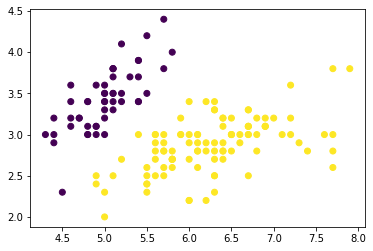

In [11]:
from sklearn.model_selection import train_test_split
from collections import Counter
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np


iris = datasets.load_iris()
x = iris.data[:, :2]             
y = (iris.target != 0) 
plt.scatter(x[:,0],x[:,1], c = y)

In [12]:
def dystans_euklidesowy(q,p):
    return np.sqrt(np.sum((p-q)**2))

def najblizszy_centroid(dystanse_do_centroidow, centroidy):
    # distance of the current sample to each centroid
    wszystkie_dystanse = [dystans_euklidesowy(dystanse_do_centroidow, point) for point in centroidy]
    index_najblizszego = np.argmin(wszystkie_dystanse)
    return index_najblizszego

def utworz_klastry(centroidy):
    # Przypisz próbki do najbliższego centroida, aby utworzyć klastry
    klastry = [[] for _ in range(k)]
    for idx, dystanse_do_centroidow in enumerate(x):
        centroid_idx = najblizszy_centroid(dystanse_do_centroidow, centroidy)
        klastry[centroid_idx].append(idx)
    return klastry

def znajdz_centroid(klastry):
    # Centroid --> Srednia z wartości w klastrze
    centroidy = np.zeros((k, liczba_cech))
    for cluster_idx, klastry in enumerate(klastry):
        srednia_klastrow = np.mean(x[klastry], axis=0)
        centroidy[cluster_idx] = srednia_klastrow
    return centroidy

def znajdz_labele_klastrow(klastry):
    # Kazda probka zostanie przypisana do klasy
    labels = np.empty(liczba_probek)

    for cluster_idx, klastry in enumerate(klastry):
        for sample_index in klastry:
            labels[sample_index] = cluster_idx
    return labels

In [18]:
k = 2
iteracje = 10

liczba_probek, liczba_cech = x.shape



# Inicjalizacja 
random_sample_idxs = np.random.choice(liczba_probek, k, replace=False)
centroidy = [x[idx] for idx in random_sample_idxs]


for _ in range(iteracje):
    # Przypisz próbkę do najbliższego centroidu
    klastry = utworz_klastry(centroidy)

    # Utworz nowy centroid, na podstawie klastra
    stare_centroidy = centroidy
    centroidy = znajdz_centroid(klastry)


# Znajdz labele 
labels = znajdz_labele_klastrow(klastry)

## Sklastrowane dane

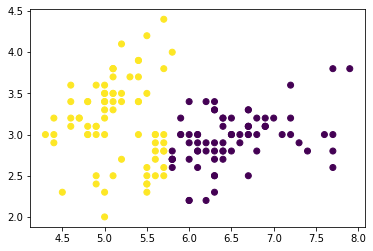

In [19]:
plt.scatter(x[:,0],x[:,1], c = labels)

## Prawdziwe wartosci

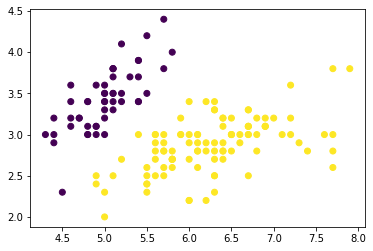

In [20]:
plt.scatter(x[:,0],x[:,1], c = y)